<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Исследование объявлений о продаже квартир

В вашем распоряжении данные
сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Изучение данных из файла

In [1]:
import pandas as pd
data = pd.read_csv('/datasets/real_estate_data.csv')
data.head()

,total_images\tlast_price\ttotal_area\tfirst_day_exposition\trooms\tceiling_height\tfloors_total\tliving_area\tfloor\tis_apartment\tstudio\topen_plan\tkitchen_area\tbalcony\tlocality_name\tairports_nearest\tcityCenters_nearest\tparks_around3000\tparks_nearest\tponds_around3000\tponds_nearest\tdays_exposition
0,20\t13000000.0\t108.0\t2019-03-07T00:00:00\t3\...
1,7\t3350000.0\t40.4\t2018-12-04T00:00:00\t1\t\t...
2,10\t5196000.0\t56.0\t2015-08-20T00:00:00\t2\t\...
3,0\t64900000.0\t159.0\t2015-07-24T00:00:00\t3\t...
4,2\t10000000.0\t100.0\t2018-06-19T00:00:00\t2\t...


по таблице мы видим что данные склеились, обработаем их и приведем таблицу в нормалыный вид

In [2]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


## Предобработка данных

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

расмотрим таблицу по категориальным признакам

In [4]:
display(data.describe())
for col in data.columns:
    if data[col].dtype == "object":
        print(col)
        print(data[col].unique())
        print()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


first_day_exposition
['2019-03-07T00:00:00' '2018-12-04T00:00:00' '2015-08-20T00:00:00' ...
 '2014-12-29T00:00:00' '2016-09-12T00:00:00' '2015-07-19T00:00:00']

is_apartment
[nan False True]

locality_name
['Санкт-Петербург' 'посёлок Шушары' 'городской посёлок Янино-1'
 'посёлок Парголово' 'посёлок Мурино' 'Ломоносов' 'Сертолово' 'Петергоф'
 'Пушкин' 'деревня Кудрово' 'Коммунар' 'Колпино'
 'поселок городского типа Красный Бор' 'Гатчина' 'поселок Мурино'
 'деревня Фёдоровское' 'Выборг' 'Кронштадт' 'Кировск'
 'деревня Новое Девяткино' 'посёлок Металлострой'
 'посёлок городского типа Лебяжье' 'посёлок городского типа Сиверский'
 'поселок Молодцово' 'поселок городского типа Кузьмоловский'
 'садовое товарищество Новая Ропша' 'Павловск' 'деревня Пикколово'
 'Всеволожск' 'Волхов' 'Кингисепп' 'Приозерск' 'Сестрорецк'
 'деревня Куттузи' 'посёлок Аннино' 'поселок городского типа Ефимовский'
 'посёлок Плодовое' 'деревня Заклинье' 'поселок Торковичи'
 'поселок Первомайское' 'Красное Село' 'посёлок

в колонке last_price не удобные числа переведем их в формат int


In [5]:
data['last_price'].astype('int')
print(data['last_price'])

0        13000000.0
1         3350000.0
2         5196000.0
3        64900000.0
4        10000000.0
            ...    
23694     9700000.0
23695     3100000.0
23696     2500000.0
23697    11475000.0
23698     1350000.0
Name: last_price, Length: 23699, dtype: float64


In [6]:
data['is_apartment'] = data['is_apartment'].fillna(False)
print(data['is_apartment'])

0        False
1        False
2        False
3        False
4        False
         ...  
23694    False
23695    False
23696    False
23697    False
23698    False
Name: is_apartment, Length: 23699, dtype: bool


переведем дату в нормальный формат

In [7]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format = '%Y-%m-%d')
print(data['first_day_exposition'])

0       2019-03-07
1       2018-12-04
2       2015-08-20
3       2015-07-24
4       2018-06-19
           ...    
23694   2017-03-21
23695   2018-01-15
23696   2018-02-11
23697   2017-03-28
23698   2017-07-21
Name: first_day_exposition, Length: 23699, dtype: datetime64[ns]


#пропущенные значения в locality_name не будем трогать, причина не понятна

In [8]:
data['locality_name'].value_counts()
print(data['locality_name'])

0            Санкт-Петербург
1             посёлок Шушары
2            Санкт-Петербург
3            Санкт-Петербург
4            Санкт-Петербург
                ...         
23694        Санкт-Петербург
23695                  Тосно
23696       село Рождествено
23697        Санкт-Петербург
23698    поселок Новый Учхоз
Name: locality_name, Length: 23699, dtype: object


заменим пропуски в days_exposition и заменим тип данных

In [9]:
data['days_exposition'] = data['days_exposition'].fillna(0).astype('int')

заменим пропуски в balcony на 0 и изменим тип данных на int

In [10]:
data['balcony'].value_counts()
data['balcony'] = data['balcony'].fillna(0)
data['balcony'] = data['balcony'].astype('int')
print(data['balcony'])

0        0
1        2
2        0
3        0
4        0
        ..
23694    0
23695    0
23696    0
23697    2
23698    0
Name: balcony, Length: 23699, dtype: int64


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
18545,6,3750000.0,43.0,2019-03-18,2,25.0,5.0,29.0,3,False,...,NaN,0,Санкт-Петербург,27054.0,8033.0,1.0,540.0,0.0,NaN,12
355,17,3600000.0,55.2,2018-07-12,2,25.0,5.0,32.0,2,False,...,NaN,2,Гатчина,NaN,NaN,NaN,NaN,NaN,NaN,259
6246,6,3300000.0,44.4,2019-03-25,2,25.0,5.0,31.3,5,False,...,5.7,0,Кронштадт,68923.0,50649.0,1.0,417.0,2.0,73.0,0
14382,9,1700000.0,35.0,2015-12-04,1,25.0,5.0,20.0,2,False,...,8.0,1,поселок Новый Свет,NaN,NaN,NaN,NaN,NaN,NaN,206
11285,0,1950000.0,37.0,2019-03-20,1,25.0,5.0,17.0,4,False,...,9.0,2,Луга,NaN,NaN,NaN,NaN,NaN,NaN,18
4643,0,4300000.0,45.0,2018-02-01,2,25.0,9.0,30.0,2,False,...,7.0,1,Санкт-Петербург,12016.0,13256.0,1.0,658.0,1.0,331.0,181
9379,5,3950000.0,42.0,2017-03-26,3,25.0,5.0,30.0,2,False,...,5.2,0,Санкт-Петербург,11647.0,13581.0,0.0,NaN,0.0,NaN,0
5669,4,4400000.0,50.0,2017-08-08,2,26.0,9.0,21.3,3,False,...,7.0,2,Санкт-Петербург,28981.0,10912.0,1.0,305.0,0.0,NaN,267
5807,17,8150000.0,80.0,2019-01-09,2,27.0,36.0,41.0,13,False,...,12.0,5,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,38
5246,0,2500000.0,54.0,2017-10-13,2,27.0,5.0,30.0,3,False,...,9.0,2,деревня Мины,NaN,NaN,NaN,NaN,NaN,NaN,540


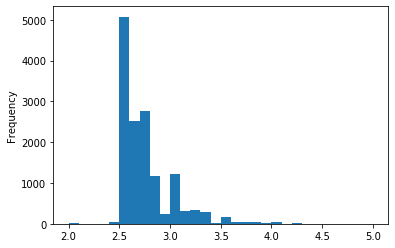

In [11]:
data['ceiling_height'].sort_values().plot(y = 'ceiling_height', kind = 'hist', bins = 30, range=(2,5))
data['ceiling_height'].value_counts()
data['ceiling_height'].describe()
data[data['ceiling_height'] > 4].sort_values('ceiling_height').tail(20)

посмотрим параметр ceiling_height, видим что есть необоснованно большие значения но пока оставим их как есть

living_area слишком много знаков после запятой и есть пропущенные значения, о их мы оставим


In [12]:
data['living_area'].value_counts()
data['living_area'].describe()
print(data['living_area'])

0        51.0
1        18.6
2        34.3
3         NaN
4        32.0
         ... 
23694    73.3
23695    38.0
23696    29.7
23697     NaN
23698    12.3
Name: living_area, Length: 23699, dtype: float64


In [ ]:
заменила пропуски медианой от количества комнат, что позволит заменить пропуски.

In [13]:
data['living_area'] = data.groupby('rooms')['living_area'].transform('median')
data['living_area'].fillna(data['living_area'])

0        45.0
1        17.6
2        30.5
3        45.0
4        30.5
         ... 
23694    45.0
23695    45.0
23696    30.5
23697    30.5
23698    17.6
Name: living_area, Length: 23699, dtype: float64

In [14]:
data['parks_around3000'].value_counts()
data['parks_around3000'].describe()
data['parks_around3000'] = data['parks_around3000'].fillna(0)
print(data['parks_around3000'].head(50))

0     1.0
1     0.0
2     1.0
3     2.0
4     2.0
5     0.0
6     0.0
7     0.0
8     0.0
9     0.0
10    1.0
11    0.0
12    0.0
13    1.0
14    0.0
15    1.0
16    3.0
17    0.0
18    1.0
19    0.0
20    0.0
21    1.0
22    0.0
23    2.0
24    3.0
25    0.0
26    0.0
27    2.0
28    0.0
29    1.0
30    0.0
31    0.0
32    0.0
33    0.0
34    0.0
35    0.0
36    1.0
37    0.0
38    0.0
39    0.0
40    0.0
41    1.0
42    2.0
43    0.0
44    1.0
45    0.0
46    0.0
47    0.0
48    0.0
49    1.0
Name: parks_around3000, dtype: float64


пропуски в данном столбце появились скорей
всего из-за того что их просто не указали, или их нет в радиусе 3 км
лагично их заменить 0

In [15]:
data['ponds_around3000'].value_counts()
data['ponds_around3000'].describe()
data['ponds_around3000'] = data['ponds_around3000'].fillna(0)
print(data['ponds_around3000'].head(50))

0     2.0
1     0.0
2     2.0
3     3.0
4     1.0
5     0.0
6     0.0
7     0.0
8     0.0
9     0.0
10    2.0
11    0.0
12    0.0
13    3.0
14    1.0
15    1.0
16    0.0
17    1.0
18    0.0
19    0.0
20    0.0
21    0.0
22    0.0
23    1.0
24    3.0
25    1.0
26    1.0
27    1.0
28    1.0
29    1.0
30    0.0
31    0.0
32    1.0
33    0.0
34    0.0
35    1.0
36    0.0
37    0.0
38    0.0
39    1.0
40    0.0
41    1.0
42    1.0
43    1.0
44    1.0
45    0.0
46    0.0
47    0.0
48    1.0
49    0.0
Name: ponds_around3000, dtype: float64


пропуски в данном столбце появились скорей всего из-за того что их просто не указали, так как нет водоем в радиуск 3 км 
и лагично их заменить 0

In [16]:
data['total_area'].value_counts()
data['total_area'].describe()
print(data['total_area'].head(100))

0     108.0
1      40.4
2      56.0
3     159.0
4     100.0
      ...  
95     47.0
96     78.3
97    146.0
98     80.0
99     90.0
Name: total_area, Length: 100, dtype: float64


In [17]:
data['ceiling_height'].value_counts()
data['ceiling_height'].describe()
data['ceiling_height'] = data['ceiling_height'].fillna(0)


## Расчёты и добавление результатов в таблицу

найдем цену квадратного метра;

In [18]:
data['price_metr'] = data['last_price'] / data['total_area']
print(data['price_metr'])

0        120370.370370
1         82920.792079
2         92785.714286
3        408176.100629
4        100000.000000
             ...      
23694     72490.845228
23695     52542.372881
23696     44091.710758
23697    149511.400651
23698     41795.665635
Name: price_metr, Length: 23699, dtype: float64


приведем в формат int что б удобнее смотреть


In [19]:
data['price_metr'].astype('int') 

0        120370
1         82920
2         92785
3        408176
4        100000
          ...  
23694     72490
23695     52542
23696     44091
23697    149511
23698     41795
Name: price_metr, Length: 23699, dtype: int64

создаю столбец дня недели


In [20]:
data['weekday_exposition'] = data['first_day_exposition'].dt.weekday

создаю столбец месяца

In [21]:
data['month_exposition'] = data['first_day_exposition'].dt.month

создаю столбец года

In [22]:
data['year_exposition'] = data['first_day_exposition'].dt.year

напишем функцию категоризации 

In [23]:
def floor_category(row):
    floors_total = row['floors_total']
    floor = row['floor']
    if floor == 1:
        return 'первый'
    elif floor == floors_total:
        return 'последний'
    elif 1 < floor < floors_total:
        return 'другой'   

категоризуем этажи с помощью функции  

In [24]:
data['floor_category'] = data.apply(floor_category, axis = 1)

добавим столбец соотношения жилой плозади к общей

In [25]:
data['useful_area_ratio'] = data['living_area'] / data['total_area']

добавим столбец отношения площади кухни к общей

In [26]:
data['kitchen_area_ratio'] = data['kitchen_area'] / data['total_area']

(-100, 1000)

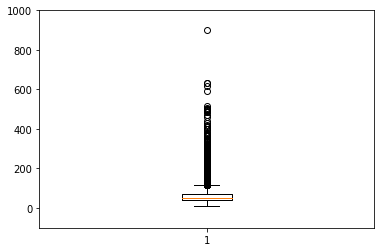

In [27]:
import matplotlib.pyplot as plt 
plt.boxplot(data['total_area'])
plt.ylim(-100,1000)

In [28]:
print(data['total_area'].describe()) 

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64


построила диаграмму размаха, в ней мы видим что часть значений лежит 
в диапазоне 52 кв метра мы видим что выбросы достаточно большие от 590 до 900 кв, м

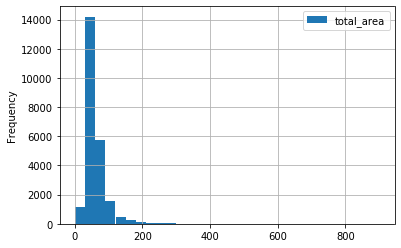

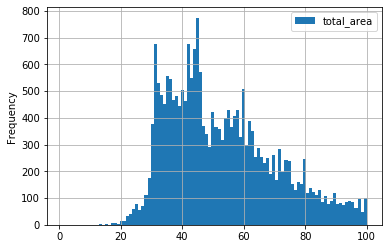

In [29]:
data.plot(y = 'total_area', kind = 'hist', bins = 30, grid = True, range = (1, 900))
data.plot(y = 'total_area', kind = 'hist', bins = 100, grid = True, range = (1, 100))

In [30]:
data[data['total_area']!=0]['total_area'].value_counts()

45.00     419
42.00     383
60.00     347
31.00     346
44.00     345
         ... 
45.85       1
44.18       1
59.83       1
127.20      1
23.55       1
Name: total_area, Length: 2182, dtype: int64

In [31]:
# среднее значение по графику 60, а медиана 52.  обнаружили выбивающиеся значения и
# методом value_counts убедились в этом - у нас аномалии на 45, 42, 60, 31, 44

(-100, 1000)

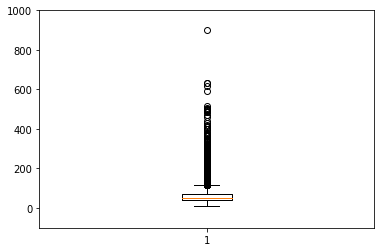

In [32]:
import matplotlib.pyplot as plt 
plt.boxplot(data['total_area'])
plt.ylim(-100,1000)

видем выбросы где 900, 590, 600, 650 м кв 

In [33]:
#отфильтруем данные от аномалий и запишем их в новый датафрейм good_data
data_area = data.query('total_area!= 900 & total_area != 590 & total_area != 600 & total_area != 650 & total_area != 0')


In [34]:
data_area = data.query('total_area < 200')

посмотрим по цене, и найдем выбросы

(1000, 100000000)

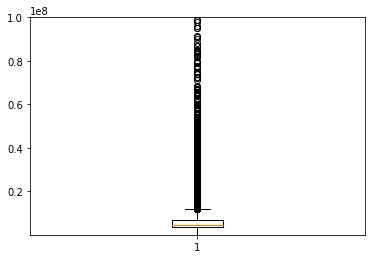

In [35]:
import matplotlib.pyplot as plt 
plt.boxplot(data['last_price'])
plt.ylim(1000,100000000)

In [36]:
price_1 = data.query('last_price < 20000000')

просмотри количество комнат и найдем выбрасы 

(0, 10)

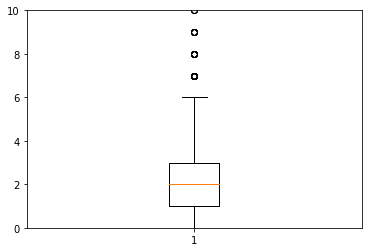

In [37]:
import matplotlib.pyplot as plt 
plt.boxplot(data['rooms'])
plt.ylim(0,10)

In [38]:
rooms_1 = data.query('rooms < 8')

тоже самое сделаем с высотой потолков 

(0, 10)

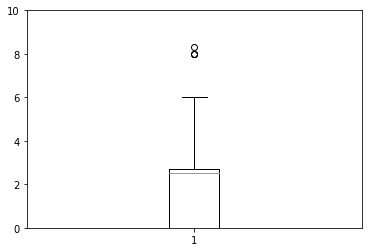

In [39]:
import matplotlib.pyplot as plt 
plt.boxplot(data['ceiling_height'])
plt.ylim(0,10)

In [40]:
ceiling_height_1 = data.query('ceiling_height < 8')

In [41]:
data = data.query('total_area < 200 & ceiling_height < 8 & rooms < 8 & last_price < 20000000')

In [42]:
data.shape

(22902, 29)

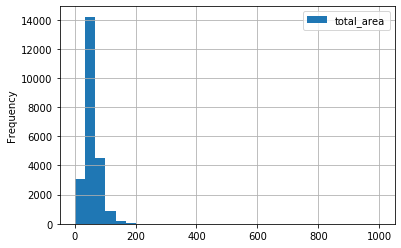

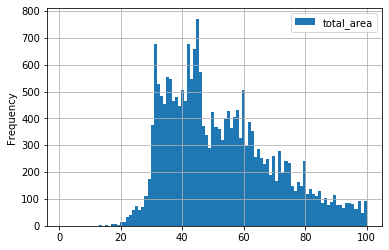

In [43]:
data.plot(y = 'total_area', kind = 'hist', bins = 30, grid = True, range = (1,1000))
data.plot(y = 'total_area', kind = 'hist', bins = 100, grid = True, range = (1,100))


In [44]:
print(data_area['total_area'].describe()) 

count    23468.000000
mean        58.155629
std         26.469479
min         12.000000
25%         40.000000
50%         51.900000
75%         68.900000
max        199.200000
Name: total_area, dtype: float64


очищенных данные с аномалиями 
в значениях меньших медианы получаем бОльшие значения медианы и среднего значения - 52 и 53 соответственно, вместо 60 и 61
но не на много. 

## Исследовательский анализ данных

1 Изучите следующие параметры: площадь, цена, число комнат, высота потолков. Постройте гистограммы для каждого параметра.

# сторим гистаграмму Площадь

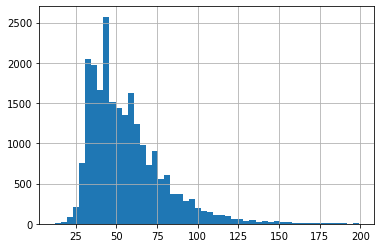

In [45]:
data['total_area'].hist(bins=50)

данной гистограмме мы видим нормальное распределение

сторим гистаграмму Цене

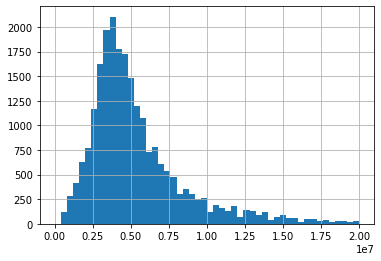

In [46]:
(data['last_price']).hist(bins=50)

count    2.290200e+04
mean     5.393105e+06
std      3.164515e+06
min      1.219000e+04
25%      3.400000e+06
50%      4.550000e+06
75%      6.500000e+06
max      1.999900e+07
Name: last_price, dtype: float64

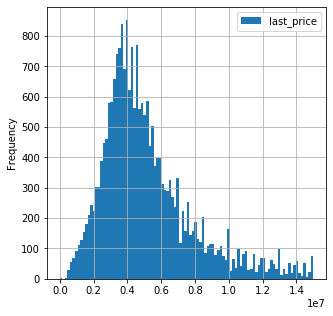

In [47]:
data.plot(y = 'last_price', kind = 'hist', bins = 100, grid=True, range = (0,15000000), figsize = (5, 5))
data['last_price'].describe()

сторим гистаграмму Число комнат

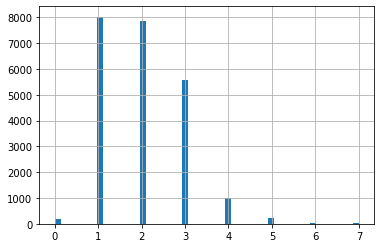

In [48]:
data['rooms'].hist(bins=50)

сторим гистаграмму Высота потолков

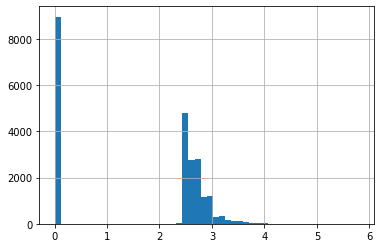

In [49]:
data['ceiling_height'].hist(bins=50)

 Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа.
 Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?

(0, 1000)

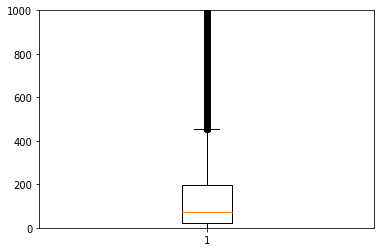

In [50]:
import matplotlib.pyplot as plt 
plt.boxplot(data['days_exposition'])
plt.ylim(0,1000)


построила диаграмму размаха, в ней мы видим что часть значений лежит в диапазоне 200 дней.

выведем среднее, медиану через describe

In [51]:
print(data['days_exposition'].describe()) 

count    22902.000000
mean       154.702559
std        210.417494
min          0.000000
25%         23.000000
50%         73.000000
75%        196.000000
max       1580.000000
Name: days_exposition, dtype: float64


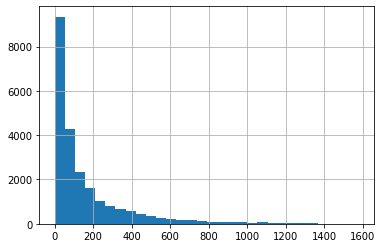

In [52]:
data['days_exposition'].hist(bins=30)

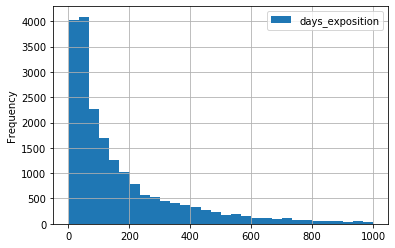

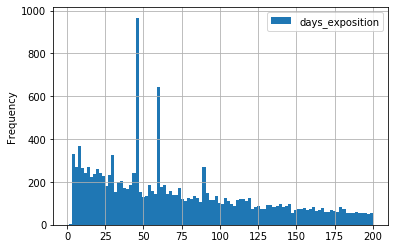

In [53]:
data.plot(y = 'days_exposition', kind = 'hist', bins = 30, grid = True, range = (1, 1000))
data.plot(y = 'days_exposition', kind = 'hist', bins = 100, grid = True, range = (1, 200))

по моим наблюдениям среднее значение 180 дней, медиана 95 дней. Есть анамальные выбросы 10 дней, 30дней, 45 дней,60 дней и 85 дней

Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили.

In [54]:
good_data = data.query('days_exposition != 45 and days_exposition != 30 & days_exposition != 60 & days_exposition != 90 & days_exposition != 7 & days_exposition != 0')

(1, 1000)

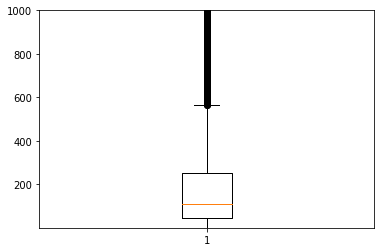

In [55]:
plt.boxplot(good_data['days_exposition'])
plt.ylim(1,1000)

In [56]:
good_data['days_exposition'].describe()

count    17913.000000
mean       192.480824
std        223.294785
min          1.000000
25%         44.000000
50%        112.000000
75%        253.000000
max       1580.000000
Name: days_exposition, dtype: float64

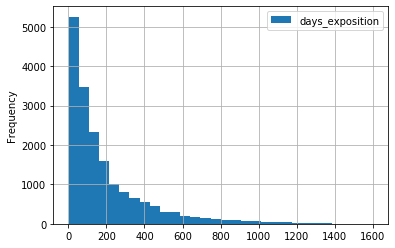

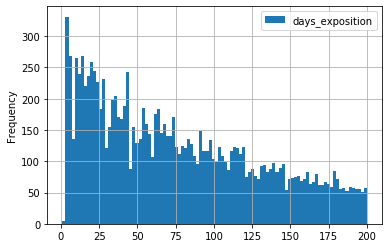

In [57]:
good_data.plot(y = 'days_exposition', kind = 'hist', bins = 30, grid = True, range = (1,1600))
good_data.plot(y = 'days_exposition', kind = 'hist', bins = 100, grid = True, range = (1,200))

теперь мы видим среднее 195, а медиана 114 дней. 

Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от площади, 
числа комнат, удалённости от центра. Изучите зависимость цены от того, на каком этаже расположена квартира: 
первом, последнем или другом. 
Также изучите зависимость от даты размещения: дня недели, месяца и года.

# Изучим зависимость цены квадратного метра от общей площади квартиры.

0.06438066377743128

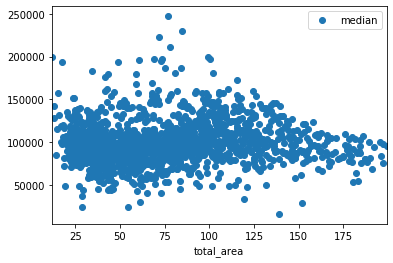

In [58]:
pivot_table_total_area = data.pivot_table(index = 'total_area', values = 'price_metr', aggfunc = ['mean', 'count', 'median'])
pivot_table_total_area.columns = ['mean', 'count', 'median']
pivot_table_total_area.plot(y = 'median', style = 'o')

pivot_table_total_area.sort_values('median', ascending = False)

data['total_area'].corr(data['price_metr'])

видим, что зависимость очень слабая - согласно корреляции Пирсона - 0.3! То есть, чем больше площадь тем немного выше стоимость!

# Изучим зависимость цены квадратного метра от числа комнат.

-0.12751846074957562

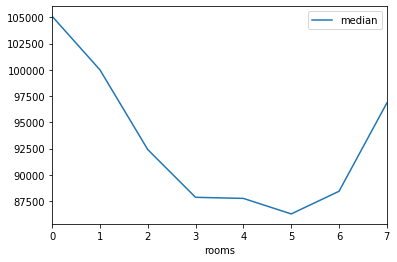

In [82]:
pivot_table_rooms = data.pivot_table(index = 'rooms', values = 'price_metr', aggfunc = ['mean', 'count', 'median'])
pivot_table_rooms.columns = ['mean', 'count', 'median']
pivot_table_rooms.plot(y = 'median')

pivot_table_rooms.query('count > 50').sort_values('median', ascending = False)

data['rooms'].corr(data['price_metr'])


чем ближе количество комнат к 3 тем ниже стоимость квадратного метра.

Изучим зависимость цены квадратного метра от этажа (первого или последнего).

,mean,count,median
floor_category,,,
первый,79988.962279,2870,80899.890039
последний,86456.639856,3173,86363.636364


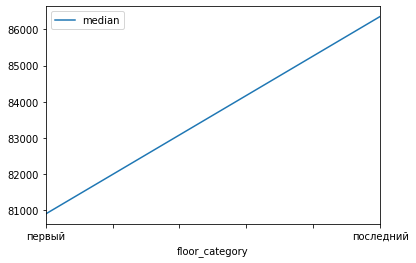

In [60]:
pivot_table_floor_category = data.query('floor_category != "другой"').pivot_table(index = 'floor_category', values = 'price_metr', aggfunc = ['mean', 'count', 'median'])
pivot_table_floor_category.columns = ['mean', 'count', 'median']
pivot_table_floor_category.plot(y = 'median')
pivot_table_floor_category

на графике видим что первый этаж дешевле, чем все последующие.

# Изучим зависимость цены квадратного метра от удалённости от центра.

-0.39154452733878986

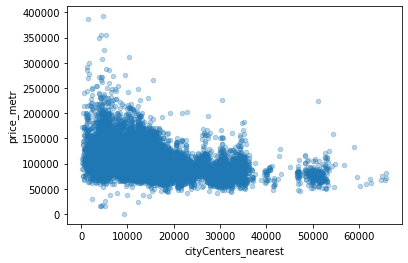

In [61]:
data.plot(kind = 'scatter', y = 'price_metr', x = 'cityCenters_nearest', alpha = 0.3)

data['cityCenters_nearest'].corr(data['price_metr'])

Чем ближе к центру, тем выше стоимость

# Изучим зависимость цены квадратного метра от даты размещения: дня недели.

,mean,count,median
weekday_exposition,,,
1,95416.181005,4064,94951.191959
2,95447.518180,3832,94745.747618
3,94721.570724,4125,94009.983361
4,94913.271399,3877,93805.309735
0,94737.182240,3483,93750.000000
6,93902.230971,1645,93701.197293
5,93375.436816,1876,92538.912287


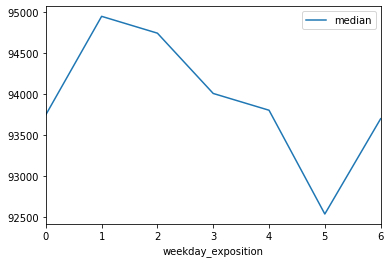

In [62]:
pivot_table_weekday_exposition = data.pivot_table(index = 'weekday_exposition', values = 'price_metr', aggfunc = ['mean', 'count', 'median'])
pivot_table_weekday_exposition.columns = ['mean', 'count', 'median']
pivot_table_weekday_exposition.plot(y = 'median')

pivot_table_weekday_exposition.sort_values('median', ascending = False)

на графике видим что ценна падает к субботе 

# Изучим зависимость цены квадратного метра от даты размещения: месяца.

,mean,count,median
month_exposition,,,
4,96638.671053,2311,95555.555556
8,95698.588543,1694,95140.168971
9,96189.410039,1918,94797.783857
3,95207.009787,2509,94444.444444
11,95207.452975,2286,94444.444444
1,95055.414125,1438,94379.957616
2,94174.537815,2546,94194.472531
7,94536.696416,1629,93975.903614
10,94423.119737,2070,93548.387097


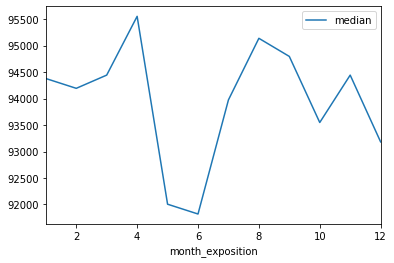

In [63]:
pivot_table_month_exposition = data.pivot_table(index = 'month_exposition', values = 'price_metr', aggfunc = ['mean', 'count', 'median'])
pivot_table_month_exposition.columns = ['mean', 'count', 'median']
pivot_table_month_exposition.plot(y = 'median')

pivot_table_month_exposition.sort_values('median', ascending = False)

мы видим что 4 и 8 месяцы(апрель и август), цена самая высокая, а 5 и 6 месяц (май, июнь) цена самая низкая

# Изучим зависимость цены квадратного метра от даты размещения: года.

,mean,count,median
year_exposition,,,
2014,105407.901474,117,103489.059728
2019,102112.993753,2778,102567.765568
2018,94801.087430,8307,95081.967213
2015,95152.356373,1112,91722.106408
2017,92902.006410,7911,91666.666667
2016,92480.436862,2677,90837.282780


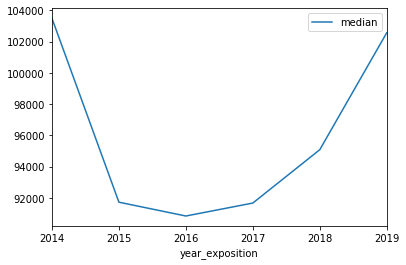

In [64]:
pivot_table_year_exposition = data.pivot_table(index = 'year_exposition', values = 'price_metr', aggfunc = ['mean', 'count', 'median'])
pivot_table_year_exposition.columns = ['mean', 'count', 'median']
pivot_table_year_exposition.plot(y = 'median')

pivot_table_year_exposition.sort_values('median', ascending = False)

по грайику видим что с 2015 по 2017 цены на квартиры пошли на спад, а уже 2018 начали расти в цене.

Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите среди них населённые пункты с самой высокой и низкой стоимостью жилья. 
Эти данные можно найти по имени в столбце 'locality_name'.

In [65]:
locality_pivot_table = data.pivot_table(index = 'locality_name', values = 'price_metr', aggfunc=['count', 'mean'])
locality_pivot_table.columns = ['count', 'mean']
locality_pivot_table = locality_pivot_table.sort_values('count', ascending = False).head(10)
locality_pivot_table

,count,mean
locality_name,,
Санкт-Петербург,14964,108660.294792
посёлок Мурино,520,85725.241381
посёлок Шушары,440,78677.364217
Всеволожск,397,67214.252635
Пушкин,359,101867.482517
Колпино,337,75333.295801
посёлок Парголово,326,90332.263023
Гатчина,306,68757.678644
деревня Кудрово,299,92473.547576


# высокая цена

In [66]:
locality_pivot_table[locality_pivot_table['mean']==locality_pivot_table['mean'].max()]

,count,mean
locality_name,,
Санкт-Петербург,14964,108660.294792


# низкая цена

In [67]:
locality_pivot_table[locality_pivot_table['mean']==locality_pivot_table['mean'].min()]

,count,mean
locality_name,,
Выборг,237,58141.909153


Самая высокая цена и большое количество объявлений в г Санкт- Петербупг, 
а самое маленькое количество объявлений и низкая цена в г. Выборг

In [68]:
print(data['cityCenters_nearest'].head(50))

0     16028.0
1     18603.0
2     13933.0
4      8098.0
5         NaN
6     19143.0
7     11634.0
8         NaN
9     15008.0
10    13878.0
11    51677.0
12        NaN
13    33058.0
14    30759.0
15    14259.0
16    10698.0
17    14616.0
18    10842.0
19    12843.0
20    19311.0
21     9722.0
22        NaN
23    14211.0
24     2336.0
25    14640.0
26    10510.0
27    11456.0
28    30710.0
29    11526.0
30        NaN
31    12944.0
32    12889.0
33    32321.0
34    12739.0
35     3502.0
36    16461.0
37        NaN
38        NaN
39    12209.0
40    19143.0
41    12612.0
43    10822.0
44    11603.0
45    12872.0
46    12702.0
47        NaN
48    16788.0
49    16603.0
50    30183.0
52     6582.0
Name: cityCenters_nearest, dtype: float64


In [69]:
# переведем метры в км

In [70]:
data['cityCenters_nearest_km'] = data['cityCenters_nearest']/1000

In [71]:
data['cityCenters_nearest_km'] = data['cityCenters_nearest_km'].fillna(0)

In [72]:
data['cityCenters_nearest_km'] = data['cityCenters_nearest_km'].astype('int')

,price_metr
cityCenters_nearest_km,
1,127923.858692
2,117152.123400
3,115702.599313
4,125346.669570
5,125660.863627
6,126520.757500
7,124081.813860
8,115953.380871
9,108703.813762


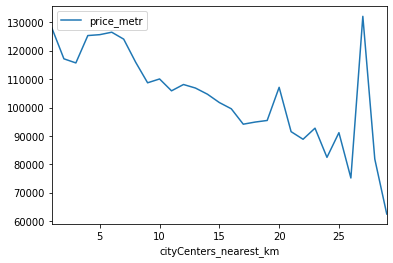

In [73]:
pivot_table_km = data.query('locality_name == "Санкт-Петербург" and cityCenters_nearest_km !=0').pivot_table(index = 'cityCenters_nearest_km', values = 'price_metr', aggfunc = 'mean')
pivot_table_km.plot()
pivot_table_km

мы видим чем ближе к центру тем квартиры дороже

выделим квартиры в центре, беря за радиус 3 км

In [74]:
center_spb_data = data.query('cityCenters_nearest_km <= 3 and locality_name == "Санкт-Петербург"')

# Зависимость стоимости квадратного метра от количества комнат.

,mean,count,median
rooms,,,
0,122701.750078,5,131250.000000
1,145618.557786,127,131432.748538
2,126769.447284,318,119138.226474
3,116349.388807,325,108691.666667
4,105477.154174,154,99336.120454
5,94171.958435,74,91531.942634
6,91001.726452,22,88131.107993
7,103081.052958,8,102691.005617


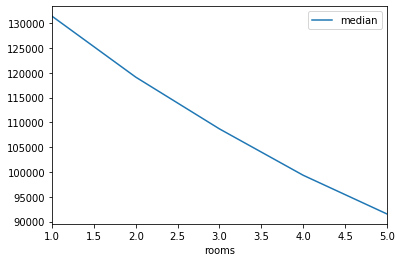

In [75]:
center_spb_rooms = center_spb_data.pivot_table(index = 'rooms', values = 'price_metr', aggfunc = ['mean', 'count', 'median'])
center_spb_rooms.columns = ['mean', 'count', 'median']
center_spb_rooms.query('count > 50').plot(y = 'median')

center_spb_rooms.query('count > 50').sort_values('median', ascending = False)

center_spb_data['rooms'].corr(center_spb_data['price_metr'])
center_spb_rooms

по графику видно что в центре, чем меньше комнат тем цена выша. 

# Зависимость стоимости квадратного метра от этажа.

,mean,count,median
floor_category,,,
первый,114082.338277,154,104924.500717
последний,119227.198746,237,109941.520468


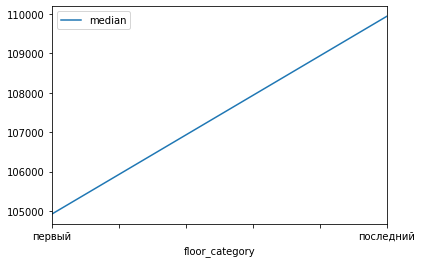

In [76]:
center_spb_floor_category = center_spb_data.query('floor_category != "другой"').pivot_table(index = 'floor_category', values = 'price_metr', aggfunc = ['mean', 'count', 'median'])
center_spb_floor_category.columns = ['mean', 'count', 'median']
center_spb_floor_category.plot(y = 'median')
center_spb_floor_category

зависимость есть, на первом этаже квадратный метр дешевле чем на последующих.

# Зависимость стоимости квадратного метра от удаленности от центра.

-0.11869585531800386

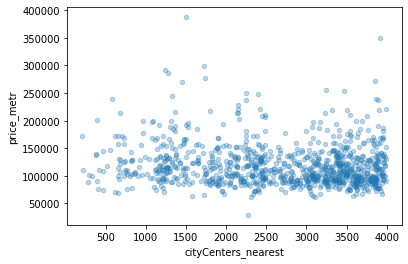

In [77]:
center_spb_data.plot(kind = 'scatter', y = 'price_metr', x = 'cityCenters_nearest', alpha = 0.3)
center_spb_data['cityCenters_nearest'].corr(center_spb_data['price_metr'])

Зависимость стоимости квадратного метра от дня недели размещения объявления.

,mean,count,median
weekday_exposition,,,
5,123916.371786,70,119078.632315
4,121523.297136,192,113766.980146
0,122099.265199,154,113740.867726
2,123734.773980,174,111199.933875
1,117556.715623,166,110255.120423
6,123189.613893,63,109574.468085
3,110547.089737,214,105277.985939


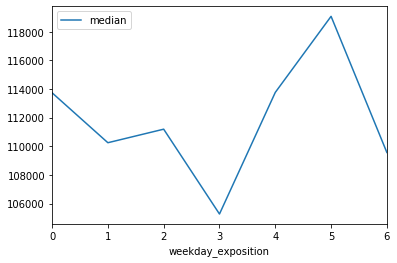

In [78]:
center_spb_weekday_exposition = center_spb_data.pivot_table(index = 'weekday_exposition', values = 'price_metr', aggfunc = ['mean', 'count', 'median'])
center_spb_weekday_exposition.columns = ['mean', 'count', 'median']
center_spb_weekday_exposition.plot(y = 'median')

center_spb_weekday_exposition.sort_values('median', ascending = False)

видим что 3 (в четверг) - цена нижа, а вот 5(в субботу) - цена выше

# Зависимость стоимости квадратного метра от месяца размещения объявления.

,mean,count,median
month_exposition,,,
12,124575.462572,72,119269.670051
10,122604.193124,81,117235.772358
3,122317.762924,117,115034.965035
4,124155.952699,111,113333.333333
9,117981.685777,89,112430.720507
2,115827.770445,115,110029.498525
1,123081.526216,63,109677.419355
7,117492.021314,86,107533.783784
8,113252.230059,65,106916.221034


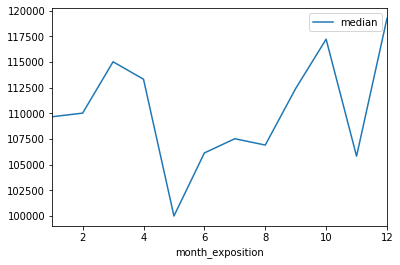

In [79]:
center_spb_month_exposition = center_spb_data.pivot_table(index = 'month_exposition', values = 'price_metr', aggfunc = ['mean', 'count', 'median'])
center_spb_month_exposition.columns = ['mean', 'count', 'median']
center_spb_month_exposition.plot(y = 'median')

center_spb_month_exposition.sort_values('median', ascending = False)

видем что в 4 апреле цена была на пике, в мая на минимуме, а вот после августа цена начала рости.и пик пришелся на декабрь 

# Зависимость стоимости квадратного метра от года размещения объявления.

,mean,count,median
year_exposition,,,
2019,125434.158619,136,119835.157215
2018,124735.844519,310,116225.002385
2017,115409.610507,361,109604.519774
2016,118584.719125,132,104136.449687
2015,108531.657296,91,95613.048369


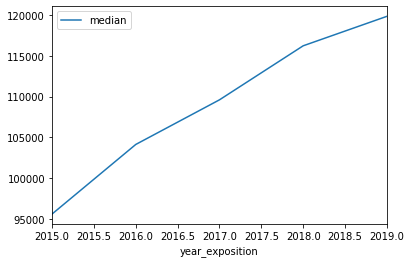

In [80]:
center_spb_year_exposition = center_spb_data.pivot_table(index = 'year_exposition', values = 'price_metr', aggfunc = ['mean', 'count', 'median'])
center_spb_year_exposition.columns = ['mean', 'count', 'median']
center_spb_year_exposition.query('count > 50').plot(y = 'median')

center_spb_year_exposition.query('count > 50').sort_values('median', ascending = False)

In [81]:
# цены начали рости с 2016 года

# ОБЩИЙ ВЫВОД

Мы обработали полученный архив данных - обработали пропущенные значения там, где это необходимо, заменили типы данных на 
необходимые для удобной работы. Посчитали и добавили в таблицу цену квадратного метра жилья, вывели из даты дни недели, 
месяцы и года размещения объявлений, добавили категории по этажам квартир. Изучили следующие параметры на наличие выбивающихся 
значений - площадь, цена, число комнат, высота потолков. Были определены аномалии в данных параметрах. Изучая время продажи 
квартир мы выявили, что большое количество объявлений было автоматически снято с Яндекс Недвижимость и дату из снятия нельзя 
считать датой продажи квартиры, поэтому, изучая средние сроки продажи квартир - данные значения не учитывались. Мы выявили при 
помощи диаграммы размаха, что нормальные значения продажи квартир варьируются от 1 до 600 дней. Мы выявили, что на стоимость 
квадратного метра квартиры больше всего влияют количество комнат, этаж квартиры, близость к центру. Незначительно на стоимость 
квадратного метра влияют день, месяц, год размещения и общая площадь. Нужно учитывать, что в 2016-2017 годах стоимость квартир 
в среднем по рынку была ниже на 10-20 %, тогда как в центре Санкт-Петербурга данной зависимости от года не обнаружено. 
В данном случае имело место постоянное удорожание стоимости, начиная с 2015 года по текущий момент. Судя, 
по резкости изменения цен в зависимости от удаления от центра СПБ, мы выявили центр города в радиусе 3 километров.